In [34]:
#key questions:
#how to handle unbalanced data: recommend down sampling (when dataset is big)
#put agenda at the first page of the pre，每页图要match你这页所表达的内容（加图的名字）
#DS每一部分都要cover到（面试是这样的，不一定要多深入，但是每个部分都要cover到）
#show feature importance and some 不能使用的features from EDA
#进入工业界，尤其是finance data，最好不用PCA，而是手动，这样就不会让解释力度变差 

### EDA, clean data and data visualization,HTML (what's your insight, what's the business problem)
### PCA, reduce the dimension of dataset 
### Select different model to forsee the result 
### Technical document and report 

# data preparation 

In [247]:
# For data manipulation
import pandas as pd
import numpy as np
import zipfile

# For data visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.offline as po
import plotly.graph_objs as go

In [49]:
df = pd.read_csv('/Users/rufen/Downloads/data_dictionary/train_data.csv')

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
#df.describe(include="all")

df.head(10)

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_4160/4274043934.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rufen/Downloads/data_dictionary/train_data.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,8.81,317.12,A,A5,NaN,NaN,MORTGAGE,56000.0,Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,852xx,AZ,20.53,0.0,Apr-2011,1.0,NaN,93.0,7.0,1.0,10494,53.3,19.0,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,301829.0,1.0,3.0,1.0,2.0,11.0,20277.0,59.0,0.0,2.0,5295.0,57.0,19700.0,3.0,1.0,3.0,5.0,43118.0,2323.0,80.6,0.0,0.0,91.0,71.0,19.0,6.0,3.0,19.0,NaN,5.0,NaN,0.0,2.0,3.0,2.0,2.0,10.0,3.0,6.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,327790.0,30771.0,12000.0,34590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,60 months,27.27,306.97,E,E5,CNC Robotic Welder,10+ years,RENT,70000.0,Source Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,612xx,IL,11.37,0.0,Nov-2008,1.0,60.0,NaN,4.0,0.0,3193,84.0,24.0,w,0.0,0.0,284.25,284.25,79.72,204.53,0.0,0.0,0.0,Dec-2018,306.97,NaN,Feb-2019,0.0,60.0,1,Individual,NaN,NaN,NaN,0.0,0.0,23289.0,2.0,2.0,3.0,5.0,1.0,20096.0,93.0,0.0,2.0,1568.0,91.0,3800.0,0.0,11.0,2.0,7.0,5822.0,232.0,87.1,0.0,0.0,120.0,89.0,17.0,1.0,0.0,17.0,60.0,3.0,60.0,2.0,1.0,2.0,1.0,3.0,20.0,2.0,4.0,2.0,4.0,0.0,0.0,0.0,3.0,91.7,100.0,0.0,0.0,25493.0,23289.0,1800.0,21693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4800,4800,4800.0,36 months,16.91,170.92,C,C5,Information Tech II,10+ years,MORTGAGE,111000.0,Source Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,231xx,VA,13.35,0.0

In [38]:
df.shape

(1827125, 145)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827125 entries, 0 to 1827124
Data columns (total 145 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          float64
 1    member_id                                   float64
 2    loan_amnt                                   int64  
 3    funded_amnt                                 int64  
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [40]:
#check missing rate 
miss_rate=pd.DataFrame(df.isnull().mean().round(2).sort_values(ascending=False))
miss_rate.reset_index(inplace=True)
miss_rate.rename({"index":"feature", 0:"miss_rate"}, axis=1,inplace=True)
miss_rate

,feature,miss_rate
0,id,1.00
1,member_id,1.00
2,hardship_reason,1.00
3,hardship_status,1.00
4,url,1.00
5,deferral_term,1.00
6,hardship_amount,1.00
7,hardship_start_date,1.00
8,hardship_end_date,1.00
9,payment_plan_start_date,1.00


In [54]:
#delete features having missing rate more than 0.3 
miss_rate = df.isnull().mean()
columns_to_drop1 = miss_rate[miss_rate > 0.3].index
columns_to_drop1

Index([], dtype='object')

In [ ]:
df=df.drop(columns=columns_to_drop1, axis=1)
df.shape

print(f'Drop {len(columns_to_drop1)} features with missing rate over 30%.')
print(f'Now the dataset has the shape {df.shape}')

In [56]:
#drop features that are irrelevant to the determination of the loan investment 
columns_to_drop2 = ['acc_now_delinq','acc_open_past_24mths','avg_cur_bal',
                 'bc_open_to_buy','bc_util',
                 'chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med',
                 'debt_settlement_flag','delinq_2yrs','delinq_amnt',
                 'disbursement_method','funded_amnt','funded_amnt_inv',
                 'hardship_flag','inq_last_6mths','last_credit_pull_d',
                 'last_pymnt_amnt','last_pymnt_d','mo_sin_old_il_acct',
                 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                 'mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd',
                 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
                 'num_il_tl','num_op_rev_tl','num_rev_accts',
                 'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m',
                 'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
                 'out_prncp','out_prncp_inv','pct_tl_nvr_dlq',
                 'percent_bc_gt_75','policy_code','pymnt_plan',
                 'recoveries','tax_liens','tot_coll_amt',
                 'tot_cur_bal','tot_hi_cred_lim','total_bal_ex_mort',
                 'total_bc_limit','total_il_high_credit_limit','total_pymnt',
                 'total_pymnt_inv','total_rec_int','total_rec_late_fee',
                 'total_rec_prncp','total_rev_hi_lim','zip_code'] 

In [57]:
df = df.drop(columns=columns_to_drop2,axis=1)
print(f'Now the dataset has the shape like {df.shape}')

Now the dataset has the shape like (1827125, 27)


In [59]:
df_col=pd.DataFrame(df.columns)
df_col

,0
0,loan_amnt
1,term
2,int_rate
3,installment
4,grade
5,sub_grade
6,emp_title
7,emp_length
8,home_ownership
9,annual_inc


#### set target column

In [60]:
df['loan_status'].value_counts()

Fully Paid     865468
Current        828131
Charged Off    133526
Name: loan_status, dtype: int64

In [ ]:
df['charged_off']=df.loan_status.map({'Fully Paid':0, 'Current':0, 'Charged Off':1})
df['charged_off'].value_counts()

In [64]:
df=df.drop(['loan_status'],axis=1)

#### check and remove duplicates 

In [68]:
print('Shape before drop duplicates:', df.shape)
df.drop_duplicates(inplace=True)
print('Shape after drop duplicates:', df.shape)

Shape before drop duplicates: (1827125, 27)
Shape after drop duplicates: (1827125, 27)


# data exploration analysis(EDA)

In [ ]:
##pre-work 

In [95]:
def cfratio(data,feature):
    '''
    This function is to calculate the ratio of charged off.
    Input:
    data: dataframe
    feature: a column in data
    Output:
    percent: charged_off/(charged_off + (fully_paid+current))
    '''
    percent = data.groupby(feature)['charged_off'].mean()
    return percent

In [96]:
def group(var, bins):
    '''
    This function is to group continuous variables by quantiles.
    Input:
    var: the continuous variable need be group
    bins: the number of group
    Output:
    An array-like object representing the respective bin for each value of var
    '''
    group = pd.qcut(df[var],bins)
    return group

In [76]:
# color & palette
gwu = ['#696969','#FFB6C1']

In [77]:
#Create a new empty list to store the variables that we no longer need.
drop3 = []

In [79]:
# grab the year which the loan was funded from 'issue_d'
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year.astype('Int64')
drop3.append('issue_d')

In [73]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,charged_off
0,10000,36 months,8.81,317.12,A,A5,NaN,NaN,MORTGAGE,56000.0,Verified,Nov-2018,debt_consolidation,Debt consolidation,AZ,20.53,Apr-2011,7.0,1.0,10494,53.3,19.0,w,Individual,3.0,1.0,1
1,10000,60 months,27.27,306.97,E,E5,CNC Robotic Welder,10+ years,RENT,70000.0,Source Verified,Nov-2018,debt_consolidation,Debt consolidation,IL,11.37,Nov-2008,4.0,0.0,3193,84.0,24.0,w,Individual,0.0,0.0,1
2,4800,36 months,16.91,170.92,C,C5,Information Tech II,10+ years,MORTGAGE,111000.0,Source Verified,Nov-2018,debt_consolidation,Debt consolidation,VA,13.35,Jun-2006,12.0,0.0,2809,35.1,19.0,w,Individual,0.0,0.0,1
3,35000,36 months,14.47,1204.23,C,C2,Engineer,1 year,RENT,95000.0,Source Verified,Nov-2018,home_improvement,Home improvement,TX,11.61,Jun-2005,5.0,0.0,5036,33.8,23.0,w,Individual,4.0,0.0,1
4,16000,60 months,10.08,340.59,B,B1,warehouse,< 1 year,RENT,45000.0,Not Verified,Nov-2018,debt_consolidation,Debt consolidation,MN,25.52,Feb-2013,10.0,0.0,10784,19.5,14.0,f,Individual,0.0,0.0,1


the charge off rate is 0.0730798385441609
the target feature is imbalanced


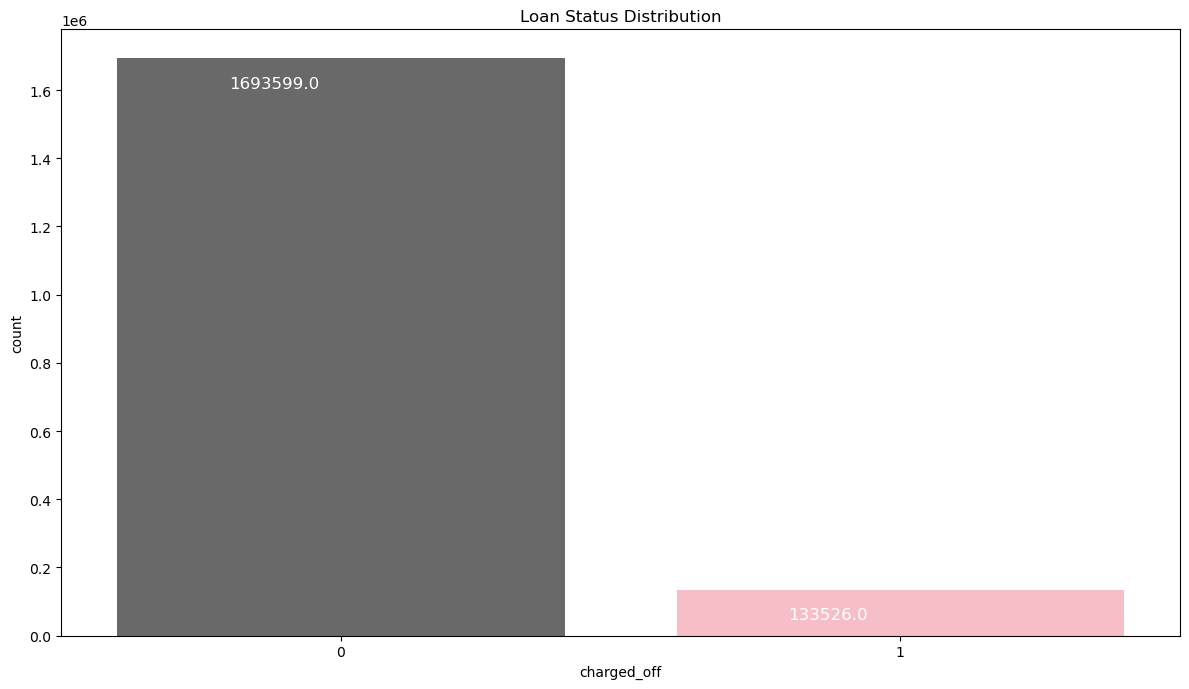

In [99]:
#show the distribution of target value 
plt.figure(figsize=(12,7))
ax = sns.countplot(x='charged_off',data=df, palette=['#696969','#FFB6C1'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2, p.get_height()), ha='left',va='top',color='w',size=12)
plt.title('Loan Status Distribution')
plt.tight_layout()

charge_off_rate= df[df['charged_off'] == 1].shape[0]/len(df['charged_off'])
print(f'the charge off rate is {charge_off_rate}') 

def ass(i):
    if abs(i - 0.5) < 0.1:
      print(f"the target feature is balanced") 
    else: 
      print(f"the target feature is imbalanced")

ass(charge_off_rate)

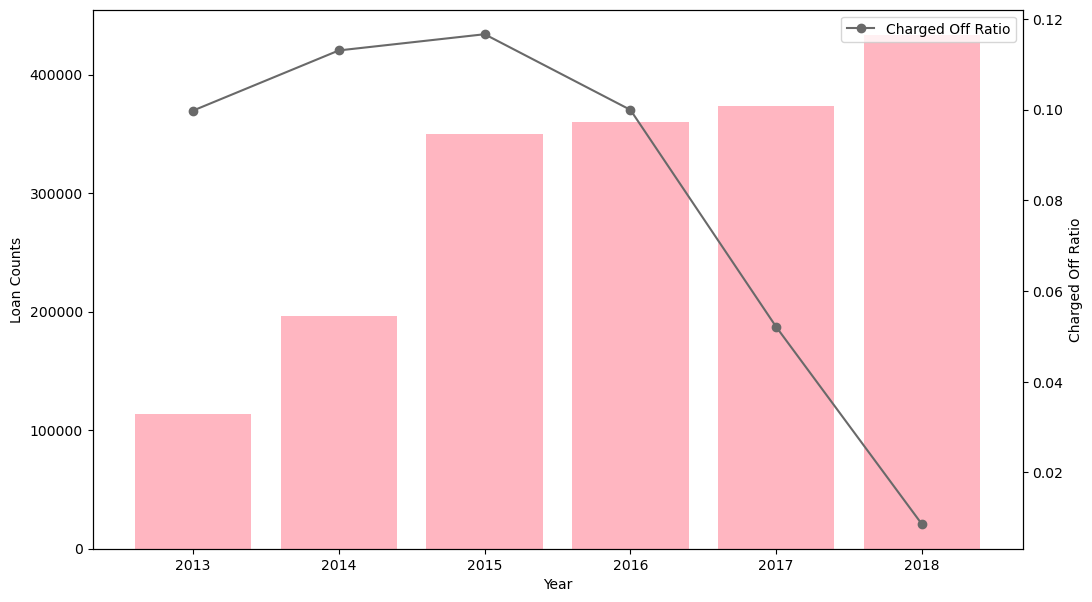

In [98]:
# show the loan counts and charged off ratio by year
ax1_df = df.groupby('issue_y')['charged_off'].count().reset_index()
ax2_df = cfratio(df,'issue_y').reset_index()
#plot
fig,ax = plt.subplots(figsize=[12,7])
ax.bar(ax1_df['issue_y'],ax1_df['charged_off'], color='#FFB6C1')
ax.set_xlabel('Year')
ax.set_ylabel('Loan Counts')
ax.set(facecolor = "white")
ax2 = ax.twinx()  #typically used in the context of creating a secondary y-axis in a matplotlib plot.
ax2.plot(ax2_df['issue_y'], ax2_df['charged_off'], label='Charged Off Ratio',color='#696969', marker='o')
ax2.set_ylabel('Charged Off Ratio')
ax2.legend()
plt.show()

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_4160/1945561675.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'correlation between loan status and numeric features')

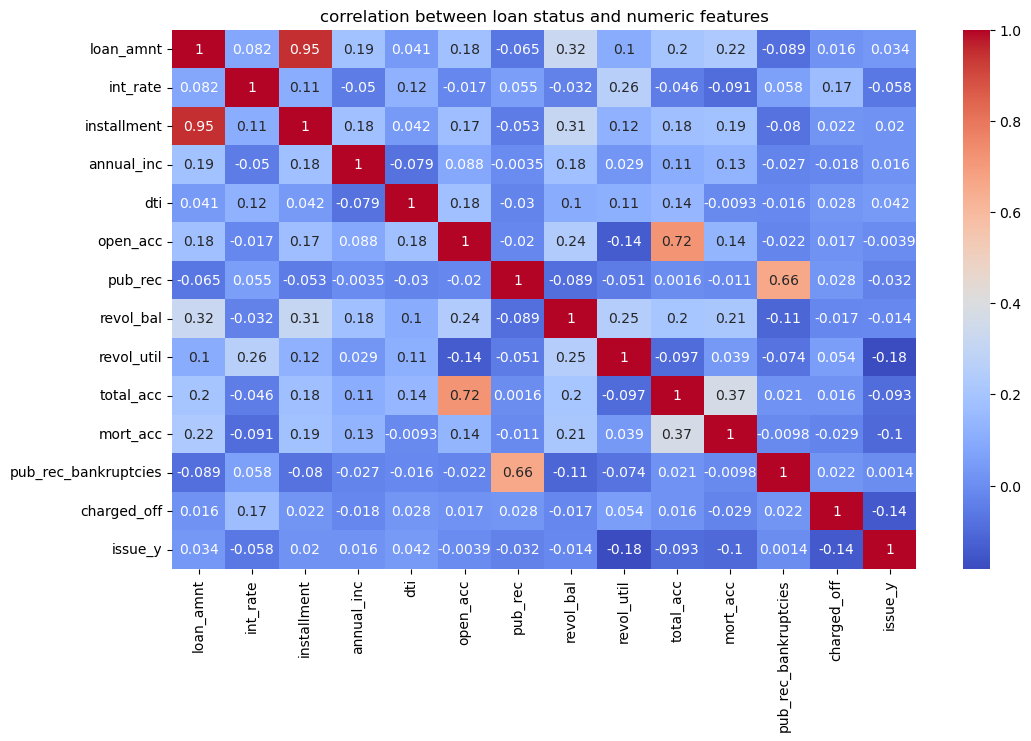

In [93]:
#use correlation analysis to find relevant features 
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("correlation between loan status and numeric features")

In [ ]:
#we find there are high relevance between loan_amnt and installment, total_acc and open_acc, pub_rec_bankruptcies and pub_rec
#so we need to analyse these pairs first

Text(0.5, 1.0, 'Installment distribution by Loan Status')

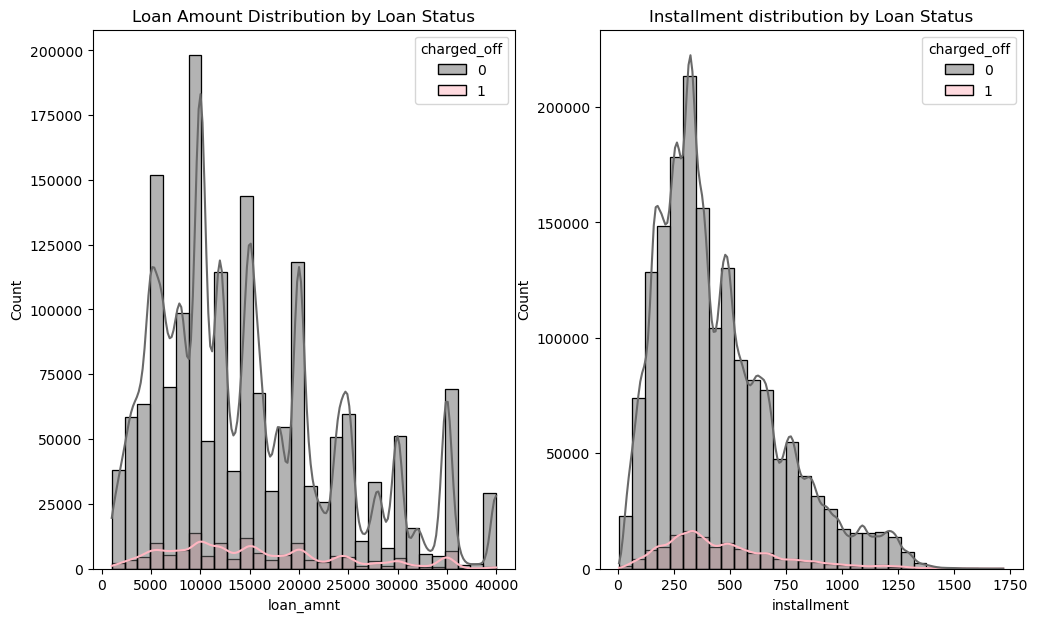

In [97]:
#loan_amnt and installment
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='loan_amnt', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Loan Amount Distribution by Loan Status')

plt.subplot(1,2,2)
sns.histplot(data=df, x='installment', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Installment distribution by Loan Status')

In [153]:
#as the two features are highly correlated and installment are higher correlating to charged_off, so i will delete, so i will drop "loan_amount"
drop3.append('loan_amnt')

Text(0.5, 1.0, 'Open_account distribution by Loan Status')

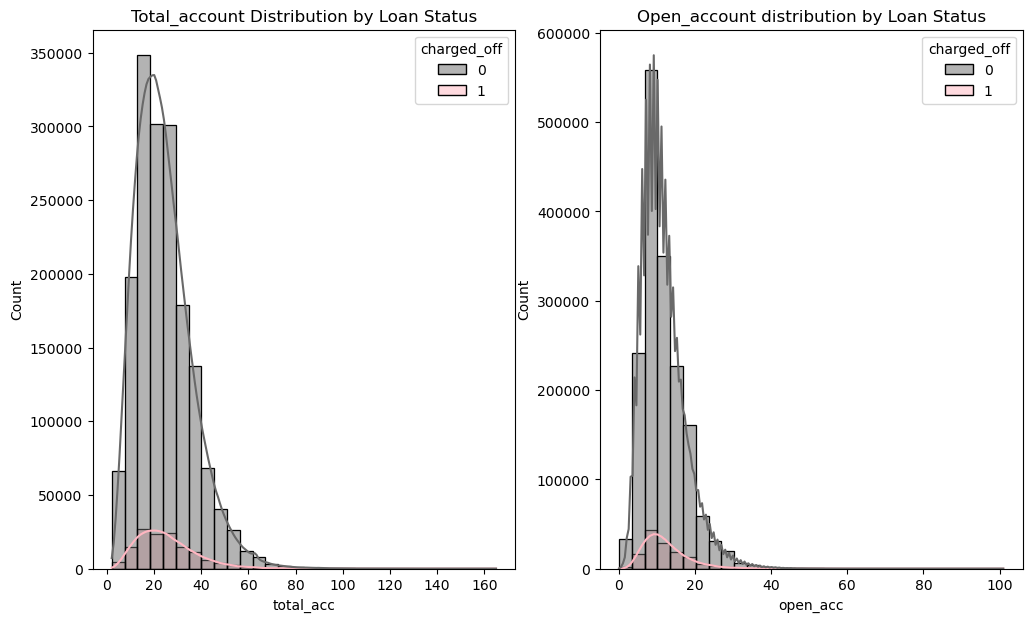

In [101]:
#total_acc and open_acc
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_acc', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Total_account Distribution by Loan Status')

plt.subplot(1,2,2)
sns.histplot(data=df, x='open_acc', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Open_account distribution by Loan Status')

In [102]:
#as there is no big difference between these two features, i will drop one of them 
drop3.append('total_acc')

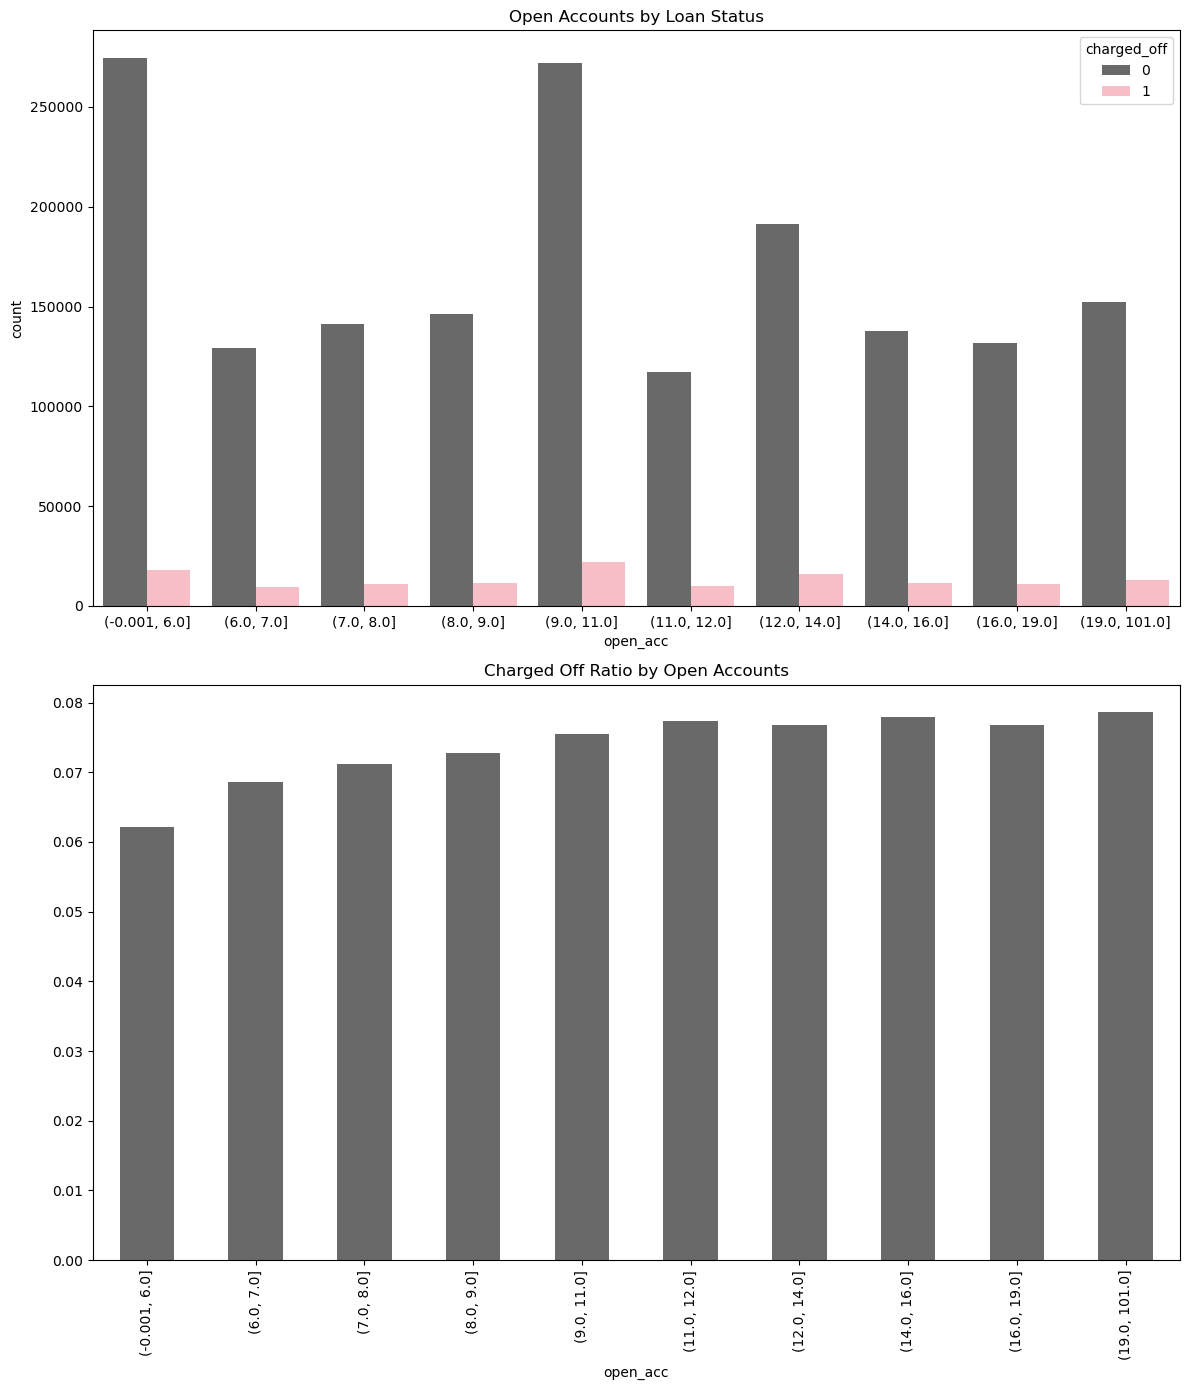

In [104]:
#see the performance of open_acc
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
sns.countplot(data=df, x=group('open_acc',10), hue='charged_off', palette=gwu)
plt.title('Open Accounts by Loan Status')
plt.subplot(2,1,2)
cfratio(df,group('open_acc',10)).plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by Open Accounts')
plt.tight_layout()

In [ ]:
#as the open accounts increase, the charge off ration increase slightly

Text(0.5, 1.0, 'Open_account distribution by Loan Status')

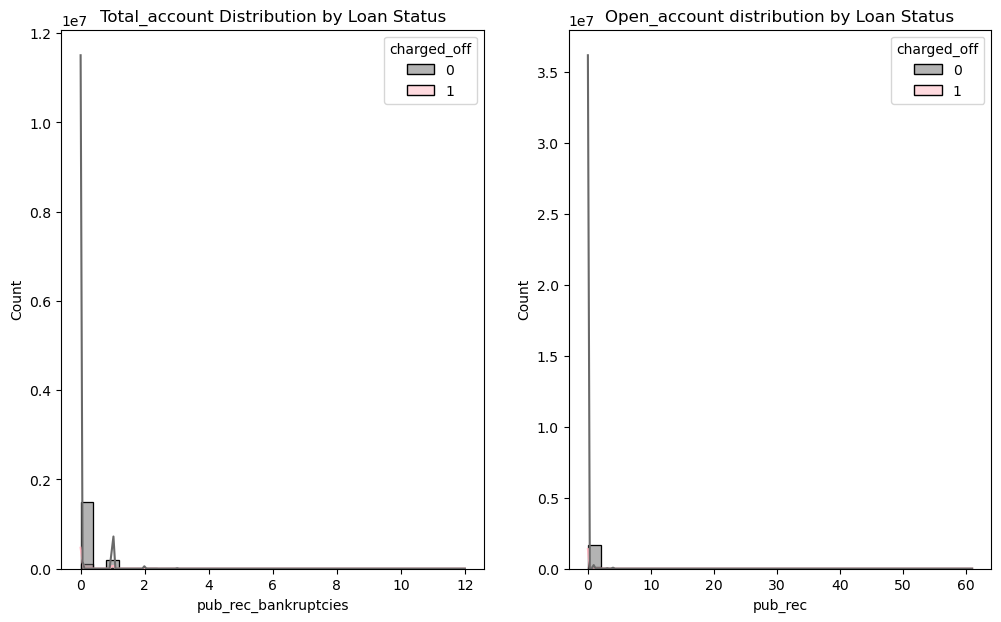

In [103]:
#pub_rec_bankruptcies and pub_rec
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='pub_rec_bankruptcies', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Total_account Distribution by Loan Status')

plt.subplot(1,2,2)
sns.histplot(data=df, x='pub_rec', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Open_account distribution by Loan Status')

In [105]:
drop3.append('pub_rec_bankruptcies')

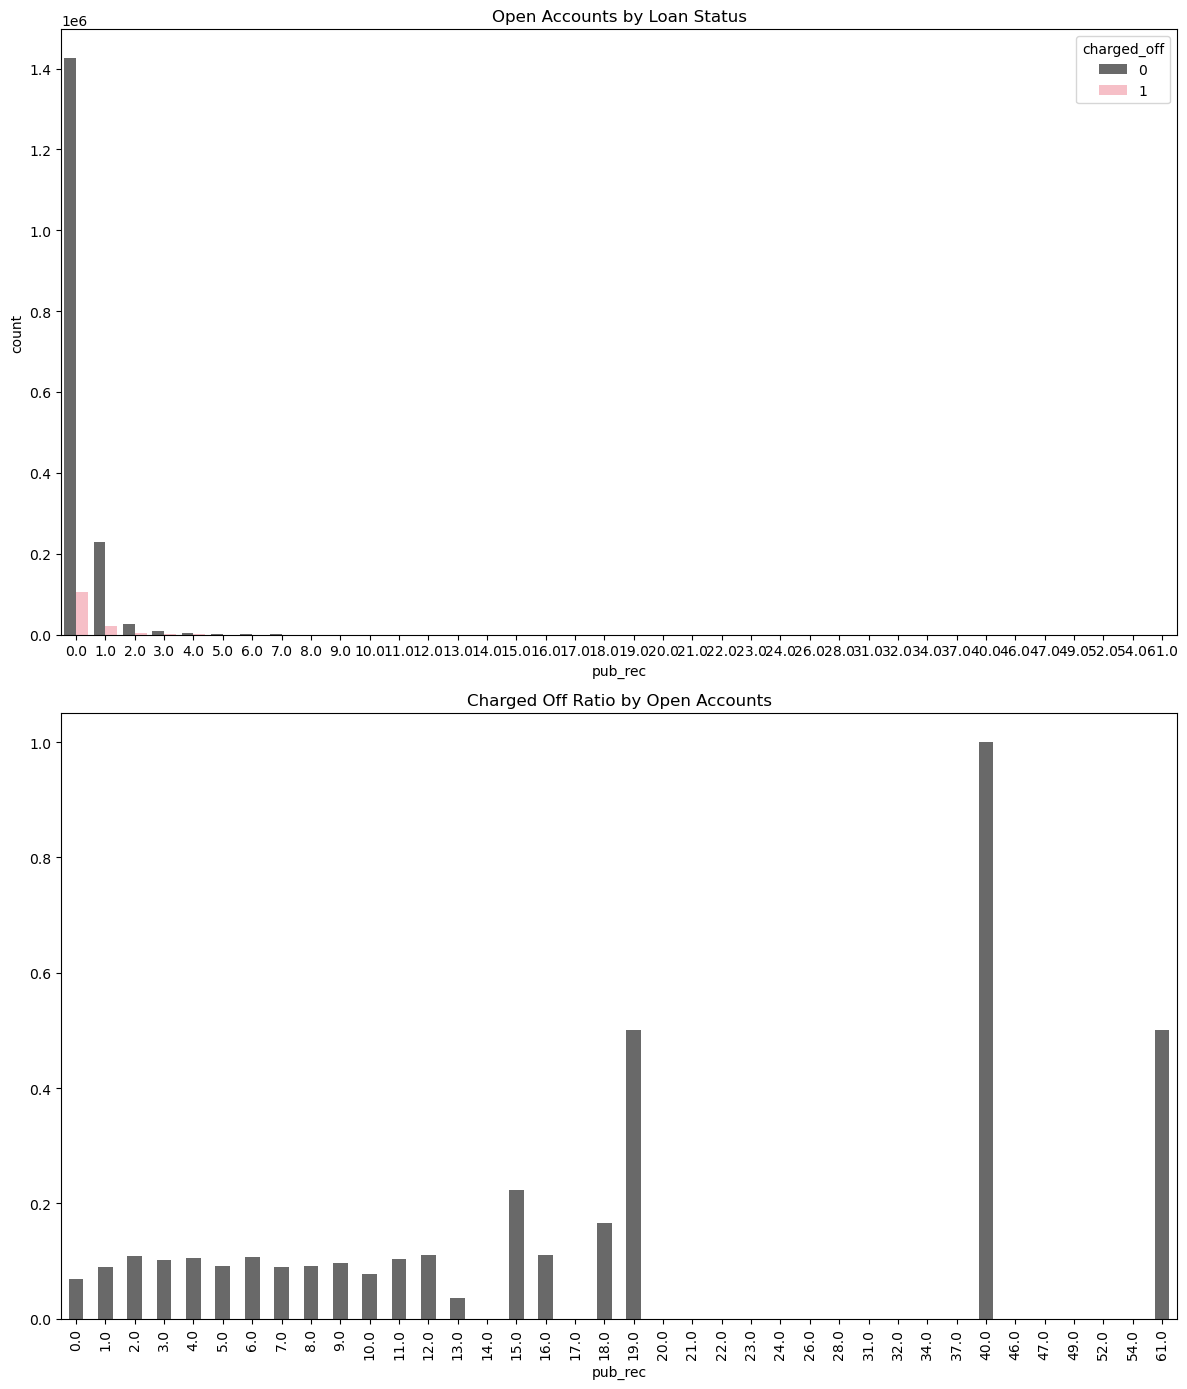

In [108]:
#analyse the remaining feature 
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
sns.countplot(data=df, x='pub_rec', hue='charged_off', palette=gwu)   #why we don't use bin here?
plt.title('Open Accounts by Loan Status')
plt.subplot(2,1,2)
cfratio(df,'pub_rec').plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by Open Accounts')
plt.tight_layout()

In [ ]:
#with the pub_rec increasing, the ratio upward dramatically, especially at 40.0 pub_rec

In [ ]:
#here we delete highly correlated columns, then, we begin to do EDA of the remaining features, see what interesting insight can we find

In [ ]:
#pair feature: looks similar 

In [112]:
def info(data):
   return data.head(2)
   print(f'Now the dataset has shape like {data.shape}')

info(df)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,charged_off,issue_y
0,10000,36 months,8.81,317.12,A,A5,NaN,NaN,MORTGAGE,56000.0,Verified,Nov-2018,debt_consolidation,Debt consolidation,AZ,20.53,Apr-2011,7.0,1.0,10494,53.3,19.0,w,Individual,3.0,1.0,1,2018
1,10000,60 months,27.27,306.97,E,E5,CNC Robotic Welder,10+ years,RENT,70000.0,Source Verified,Nov-2018,debt_consolidation,Debt consolidation,IL,11.37,Nov-2008,4.0,0.0,3193,84.0,24.0,w,Individual,0.0,0.0,1,2018


In [114]:
#here we see grade and sub_grade are similar categories. For sub_grade is more specific, i will delete grade
df['grade'].unique(), df['sub_grade'].unique()

(array(['A', 'E', 'C', 'B', 'D', 'G', 'F'], dtype=object),
 array(['A5', 'E5', 'C5', 'C2', 'B1', 'C1', 'C3', 'B2', 'D2', 'D3', 'B3',
        'A2', 'E3', 'G1', 'B4', 'D4', 'B5', 'E2', 'E4', 'D1', 'A4', 'D5',
        'C4', 'A1', 'F2', 'F1', 'E1', 'F4', 'F5', 'A3', 'G2', 'F3', 'G4',
        'G3', 'G5'], dtype=object))

In [115]:
drop3.append('grade')

Text(0.5, 1.0, 'Charged Off Ratio by Sub Grade')

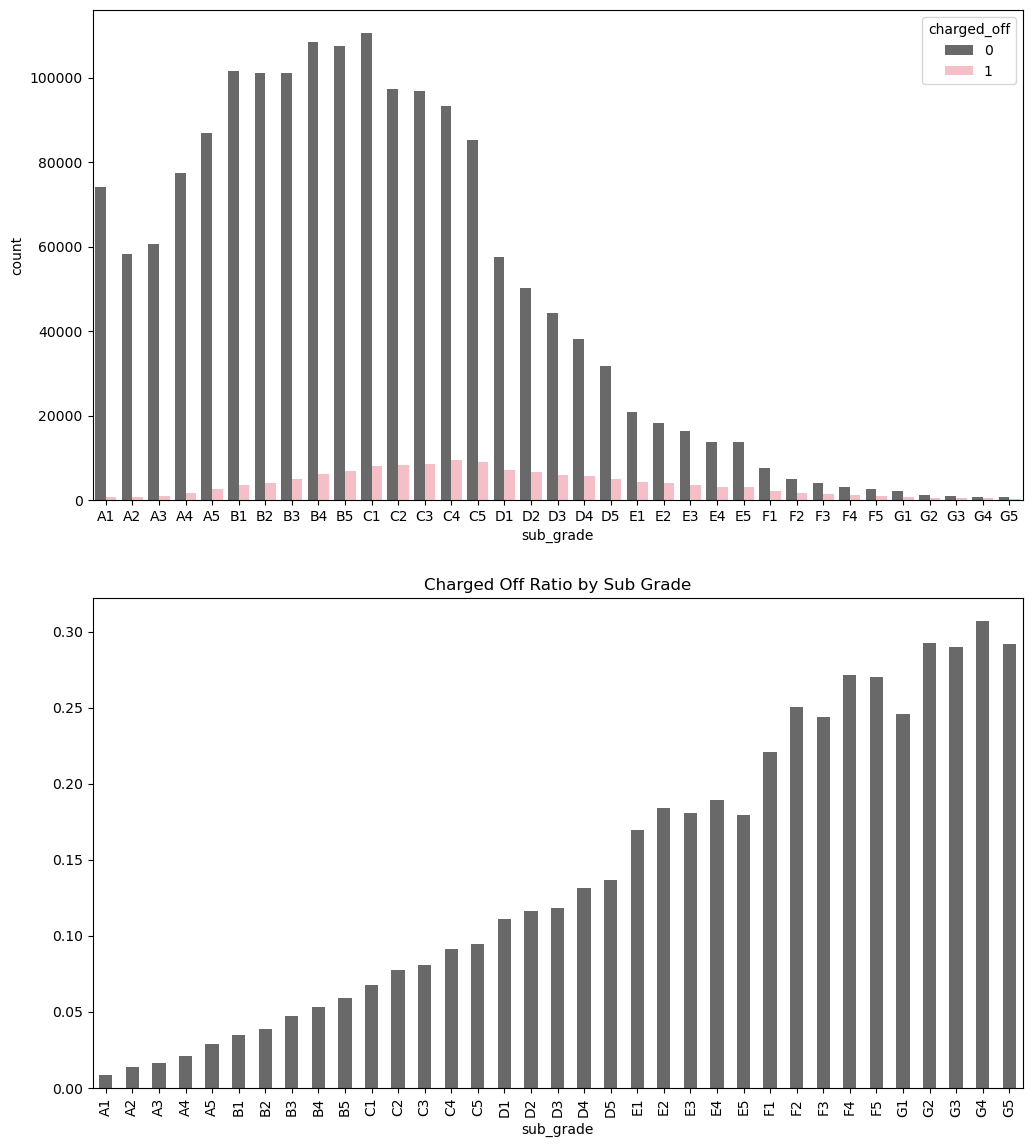

In [121]:
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
sub_grade = sorted(df['sub_grade'].unique().tolist())
sns.countplot( data=df,x='sub_grade', hue='charged_off', order=sub_grade, palette=gwu)
plt.subplot(2,1,2)
cfratio(df,'sub_grade').plot(kind='bar',color='#696969')
plt.title('Charged Off Ratio by Sub Grade')

In [ ]:
#sub_grade has a high impact 

In [ ]:
# plt.figure(figsize=(12.14))
# plt.subplot(2,1,1)
# sub_grade = sorted(df['sub_grade'].unique().tolist())
# sns.countplot( data=df,x='sub_grade', hue='charged_off', order=sub_grade, palette=gwu)
# plt.subplot(2,1,2)
# cfratio(df,'sub_grade').plot(kind='bar', color='#696969')
# plt.title('charge off ratio by sub_grade')
# plt.tight_layout()    can not use this coed here, the last code is the wrong code

In [127]:
#emp_title and emp_length 
df['emp_title'].describe()

count     1692172
unique     401005
top       Teacher
freq        33007
Name: emp_title, dtype: object

In [140]:
title_count = pd.DataFrame(df['emp_title'].value_counts())
title_count = title_count.reset_index(drop=False)
title_count = title_count.rename(columns={'index':'emp_title', 'emp_title':'number'})
title_count.head(20)

,emp_title,number
0,Teacher,33007
1,Manager,28941
2,Owner,18393
3,Registered Nurse,13430
4,RN,12506
5,Driver,12209
6,Supervisor,11992
7,Sales,10901
8,Project Manager,9371
9,Office Manager,8319


In [128]:
title_count= df['emp_title'].value_counts()
column = title_count[title_count > 100].index
top_20_elements = column[:20]
top_20_elements

Index(['Teacher', 'Manager', 'Owner', 'Registered Nurse', 'RN', 'Driver', 'Supervisor', 'Sales', 'Project Manager', 'Office Manager', 'General Manager', 'Director', 'owner', 'President', 'Engineer', 'manager', 'teacher', 'Operations Manager', 'Vice President', 'Accountant'], dtype='object')

Text(0.5, 1.0, 'Top 20 Job Titles')

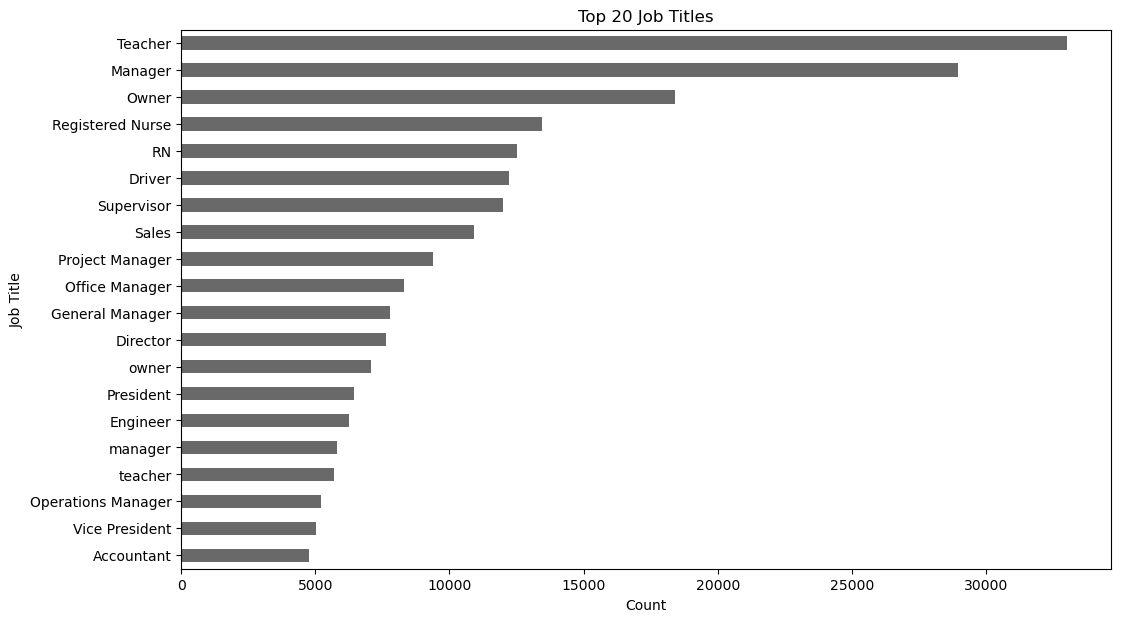

In [175]:
plt.figure(figsize=(12,7))
df['emp_title'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh', color='#696969')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles')

In [145]:
order=['Teacher', 'Manager', 'Owner', 'Registered Nurse', 'RN', 'Driver', 'Supervisor', 'Sales', 'Project Manager', 'Office Manager', 'General Manager', 'Director', 'owner', 'President', 'Engineer', 'manager', 'teacher', 'Operations Manager', 'Vice President', 'Accountant']

In [ ]:
#the relationship between emp_title and charge_off rate
# plt.figure(figsize=(12,14))
# plt.subplot(2,1,1)
# sns.countplot(data=df, x='emp_title', hue='charged_off', order=order,palette=gwu)
# plt.title('charge_off rate by employment title')
# plt.subplot(2,1,2)
# cfratio(df,'emp_title').plot(kind='bar', color='#696969')
# plt.title('Charged Off Ratio by employment title')

In [147]:
#too many unique values, drop emp_title
drop3.append('emp_title')

In [149]:
#emp_length
df["emp_length"].unique()

array([nan, '10+ years', '1 year', '< 1 year', '4 years', '6 years',
       '3 years', '2 years', '7 years', '8 years', '5 years', '9 years'],
      dtype=object)

Text(0.5, 1.0, 'Charged Off Ratio by employment years')

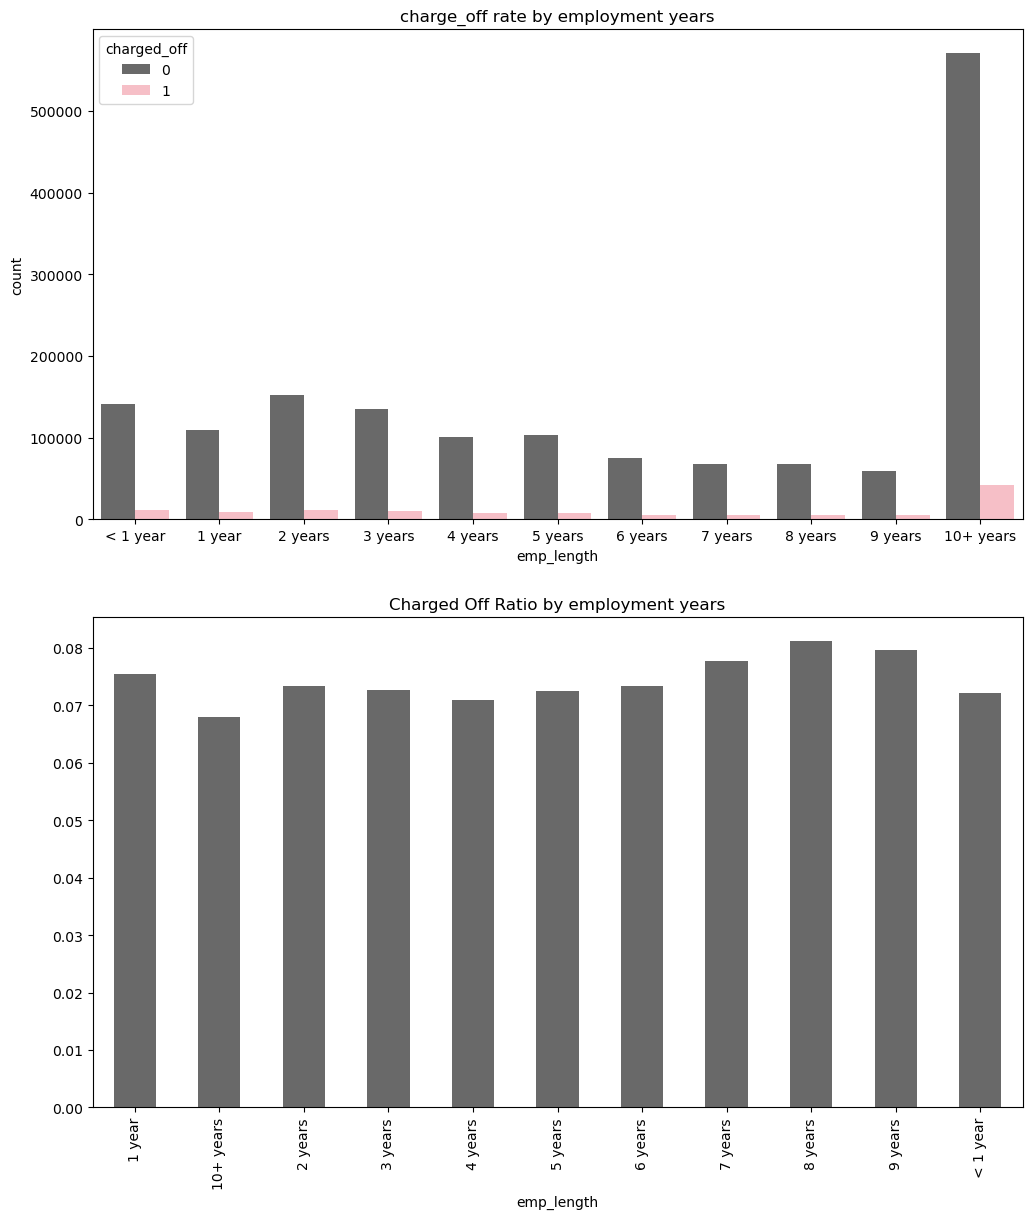

In [151]:
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(data=df, x='emp_length', hue='charged_off', order=order,palette=gwu)
plt.title('charge_off rate by employment years')
plt.subplot(2,1,2)
cfratio(df,'emp_length').plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by employment years')

In [152]:
#no big differenciation 
drop3.append('emp_length')

In [162]:
#purpose and title
df['purpose'].unique(), len(df['title'].unique())

(array(['debt_consolidation', 'home_improvement', 'major_purchase',
        'credit_card', 'moving', 'medical', 'small_business', 'other',
        'house', 'car', 'vacation', 'renewable_energy', 'wedding',
        'educational'], dtype=object),
 29127)

Text(0.5, 1.0, 'Charged Off Ratio by purpose')

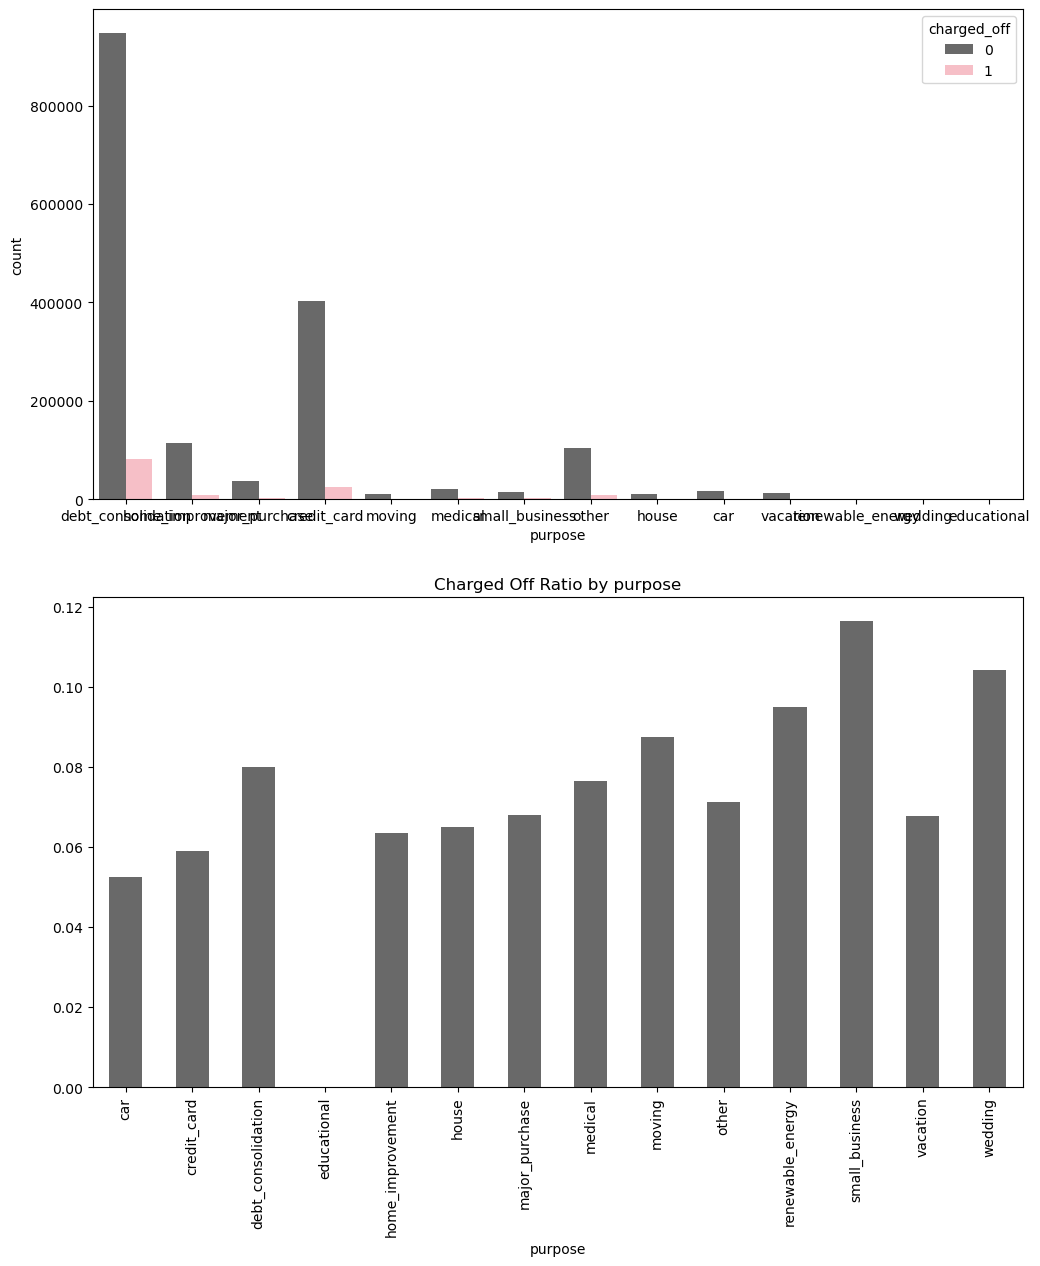

In [164]:
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
sns.countplot( data=df,x='purpose', hue='charged_off', palette=gwu)
plt.subplot(2,1,2)
cfratio(df,'purpose').plot(kind='bar',color='#696969')
plt.title('Charged Off Ratio by purpose')

In [163]:
#too many unique values for title 
drop3.append('title')

In [165]:
#seriously wrong data existing, 'educational'
drop3.append('purpose')

In [ ]:
#then, remaining single features  
#loan_amnt and installment, total_acc and open_acc, pub_rec_bankruptcies and pub_rec,emp_,purpose, title, grade, subgrade

In [ ]:
#term 
df=df.rename(columns={'term':'term_month'})

# Remove the unit from the values
df['term_month'] = df['term_month'].str.replace(r'\D+', '', regex=True)

Text(0.5, 1.0, 'Charged Off Ratio by Terms')

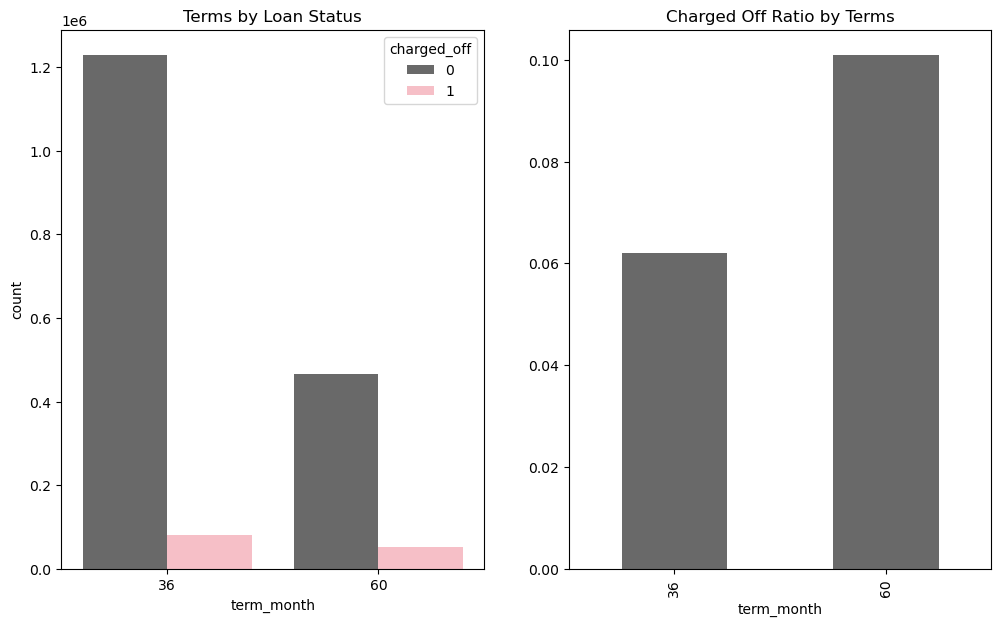

In [169]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='term_month', hue='charged_off', palette=gwu)
plt.title('Terms by Loan Status')
plt.subplot(1,2,2)
cfratio(df,'term_month').plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by Terms')

In [26]:
# # using filter() to select unique columns 
# filtered_columns1 = df.filter(like='sec', axis=1).columns
# filtered_columns2 = df.filter(like='settlement', axis=1).columns
# filtered_columns3 = df.filter(like='hardship', axis=1).columns

# # delete columns like "sec%"
# df = df.drop(columns=filtered_columns1, axis=1)
# df = df.drop(columns=filtered_columns2, axis=1) 
# df = df.drop(columns=filtered_columns3, axis=1) 

<Axes: xlabel='int_rate', ylabel='Count'>

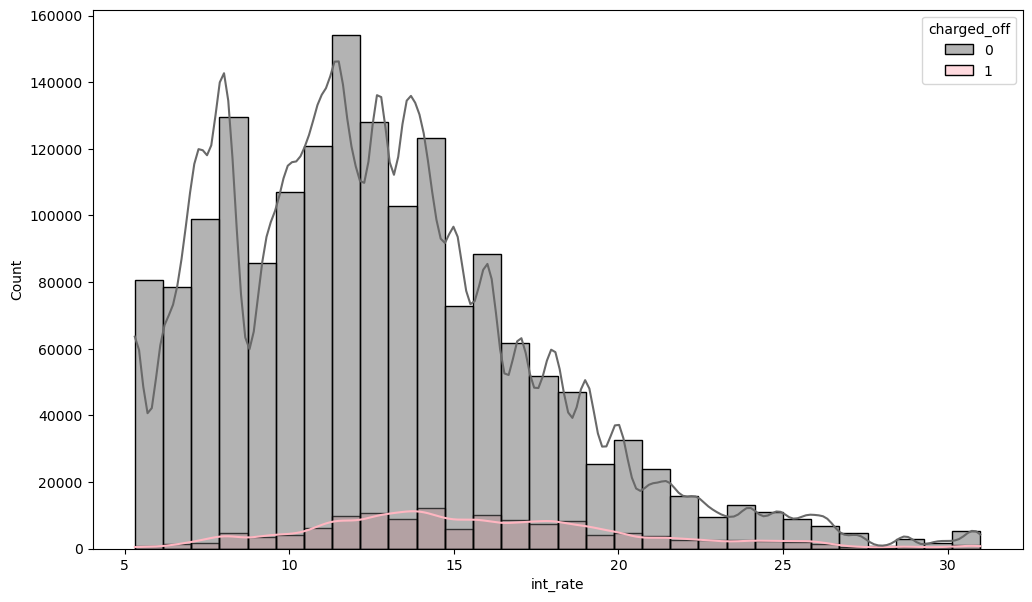

In [173]:
#int rate
plt.figure(figsize=(12,7))
sns.histplot(data=df,x='int_rate', hue='charged_off', bins=30, kde=True, palette=gwu)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(5.308999999999999, 8.39]'),
  Text(1, 0, '(8.39, 11.39]'),
  Text(2, 0, '(11.39, 13.58]'),
  Text(3, 0, '(13.58, 16.55]'),
  Text(4, 0, '(16.55, 30.99]')])

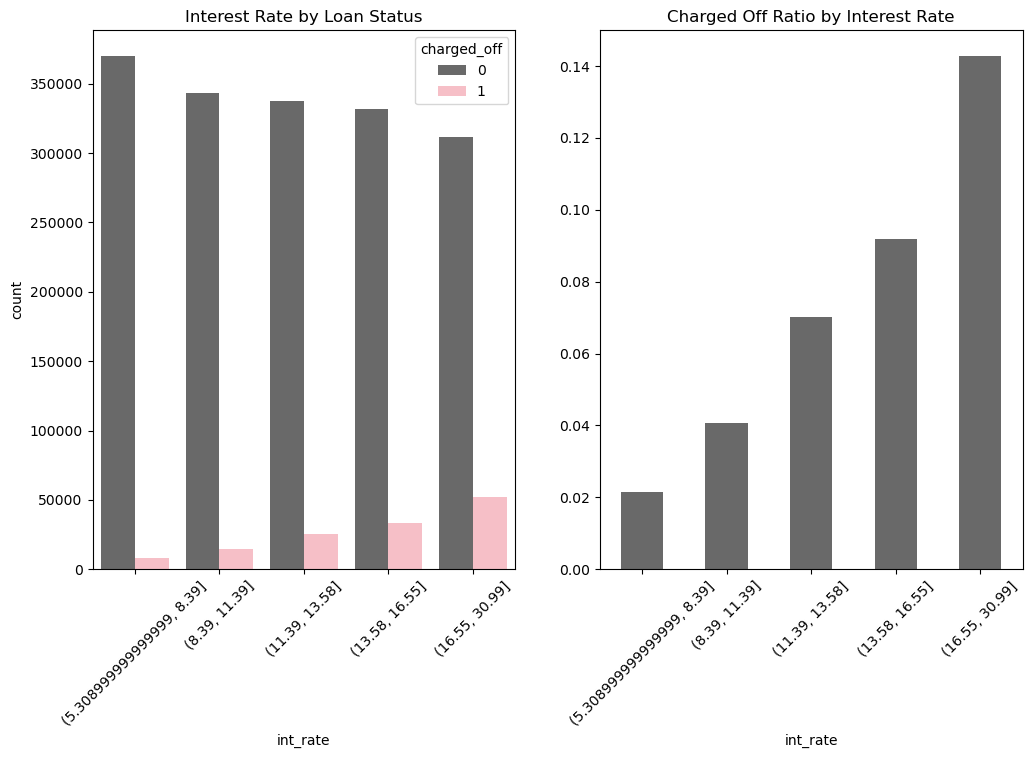

In [178]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x=group('int_rate',5), hue='charged_off', palette=gwu)
plt.xticks(rotation=45)
plt.title('Interest Rate by Loan Status')
plt.subplot(1,2,2)
cfratio(df,group('int_rate',5)).plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by Interest Rate')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'the distribution of home ownership')

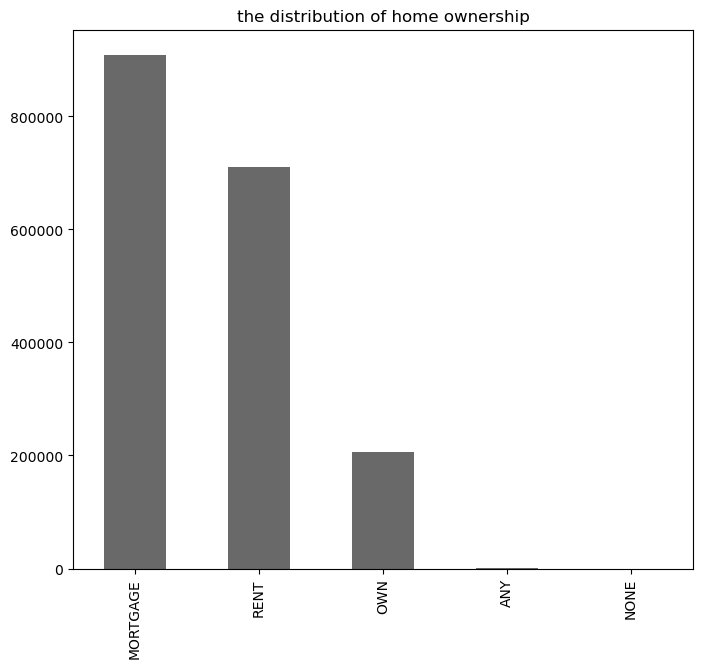

In [180]:
#home own
plt.figure(figsize=(8,7))
df.home_ownership.value_counts().plot(kind='bar', color = '#696969')
plt.title('the distribution of home ownership')

Text(0.5, 1.0, 'Charged Off Ratio by home_ownership')

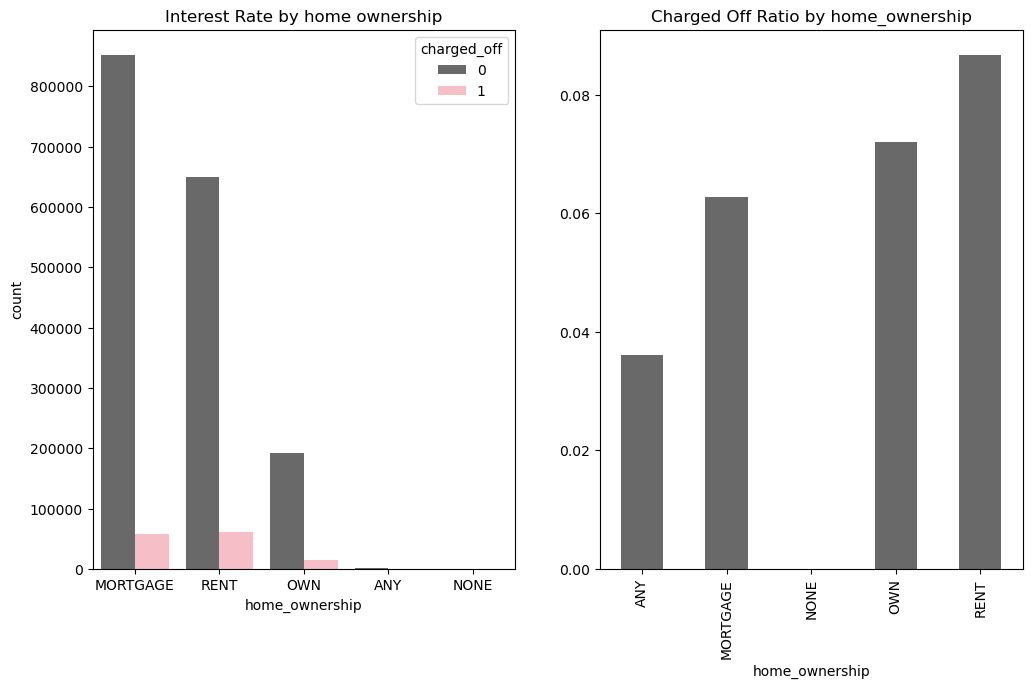

In [182]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='home_ownership', hue='charged_off', palette=gwu)
plt.title('Interest Rate by home ownership')
plt.subplot(1,2,2)
cfratio(df,'home_ownership').plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by home_ownership')

In [184]:
#annul income
df.annual_inc.describe()

count    1.827125e+06
mean     7.879205e+04
std      1.207525e+05
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [189]:
len(df[df['annual_inc'] == 0])

1411

In [ ]:
#The annual income variable has a large range which ranges from 0 to 110 million. So I will take a log transform of the annual income to analysis this varaible.

In [191]:
df['log_annual_inc'] = np.log(df[df['annual_inc']>0]['annual_inc'])

<Axes: xlabel='log_annual_inc', ylabel='Count'>

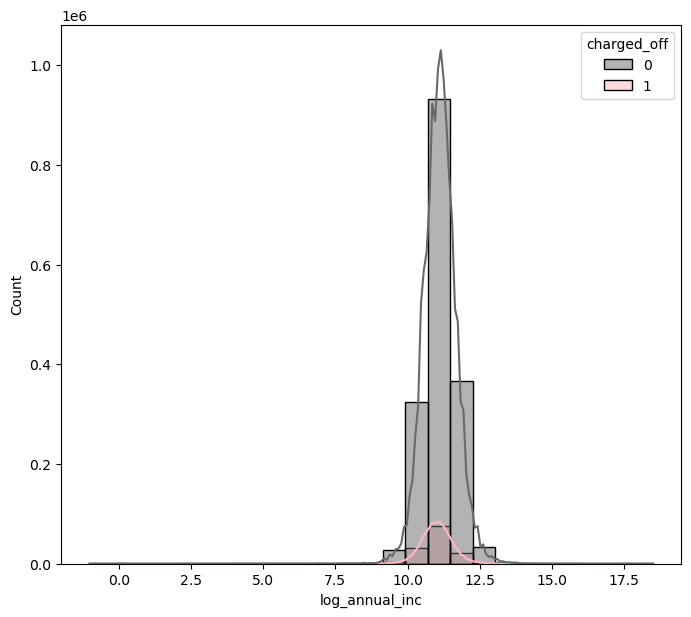

In [195]:
plt.figure(figsize=(8,7))
sns.histplot(data=df,x='log_annual_inc', hue='charged_off', bins=25, kde=True, palette=gwu)

Text(0.5, 1.0, 'Charged Off Ratio by Annual Income')

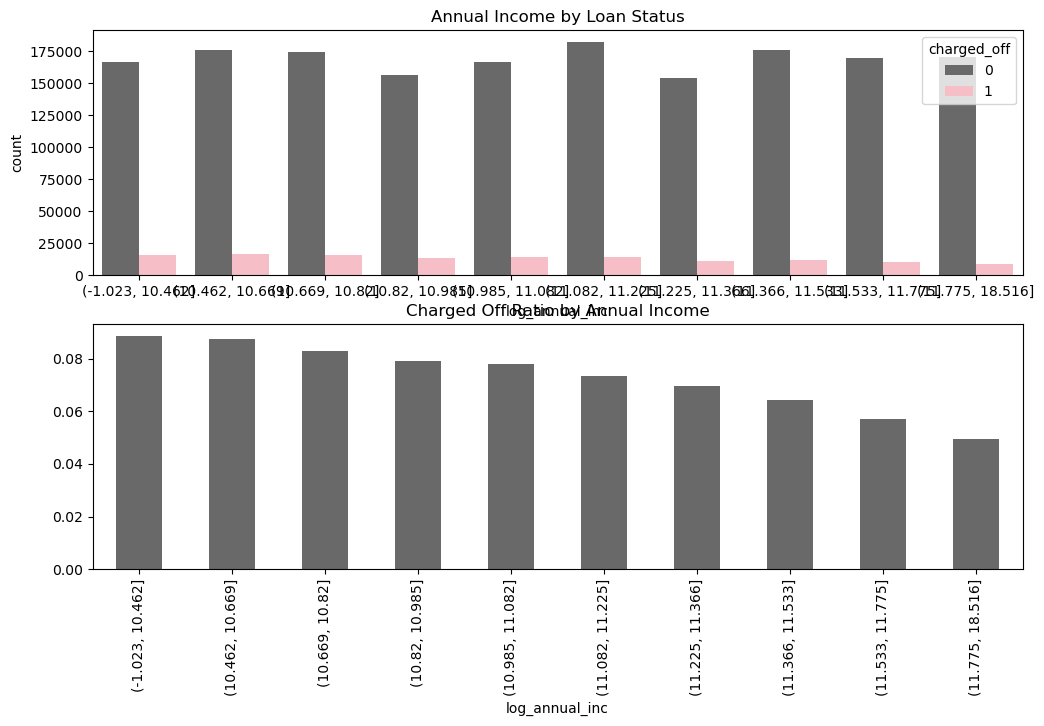

In [196]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
sns.countplot(data=df, x=group('log_annual_inc',10), hue='charged_off', palette=gwu)
plt.title('Annual Income by Loan Status')
plt.subplot(2,1,2)
cfratio(df,group('log_annual_inc',10)).plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by Annual Income')

In [197]:
drop3.append('log_annual_inc')

Text(0.5, 1.0, 'Charged Off Ratio by Verification Status')

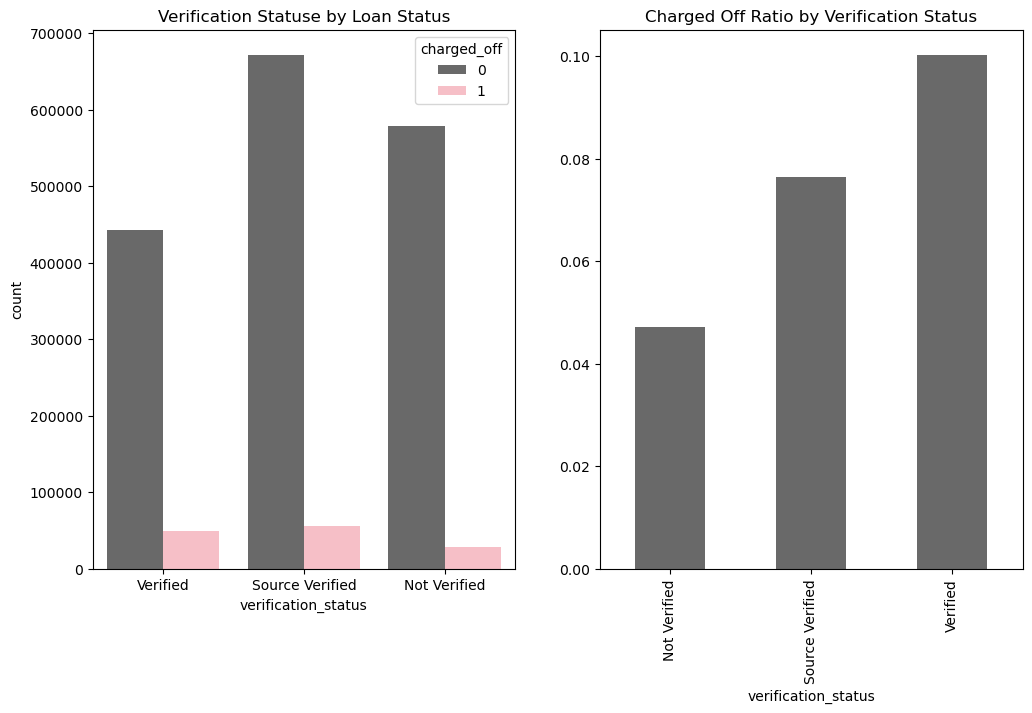

In [198]:
#verification status
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='verification_status', hue='charged_off', palette=gwu)
plt.title('Verification Statuse by Loan Status')
plt.subplot(1,2,2)
cfratio(df,'verification_status').plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by Verification Status')


Text(0.5, 1.0, 'Charged Off Ratio by dti')

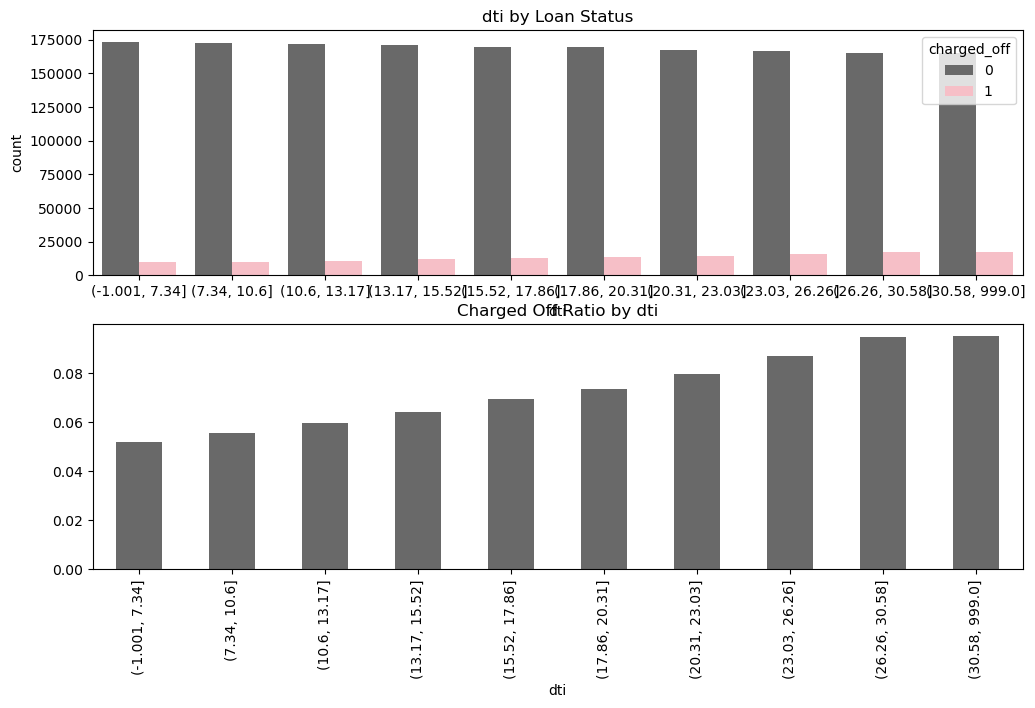

In [200]:
#dti
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
sns.countplot(data=df, x=group('dti',10), hue='charged_off', palette=gwu)
plt.title('dti by Loan Status')
plt.subplot(2,1,2)
cfratio(df,group('dti',10)).plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by dti')

In [202]:
#dealing with time features
# earliest_cr_line
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year
df['earliest_cr_line'].value_counts()

2004    117455
2003    116286
2005    112946
2002    109644
2001    108757
2006    102371
2000    102276
1999     92782
2007     79537
1998     77426
1997     67436
1996     65894
1995     61668
1994     55096
2008     52134
1993     45665
2009     33609
1990     32262
1992     32189
2010     32114
2011     31987
1991     30345
1989     29775
2012     25371
1988     24767
1987     22907
1986     19710
2013     19091
1985     17087
1984     15830
2014     13226
1983     12838
1982      9995
1981      7328
1979      6206
1978      5945
1980      5768
1977      5191
2015      4231
1976      3992
1975      3011
1974      2637
1973      2433
1972      2054
1971      1381
1970      1353
1969      1213
1968       893
1967       783
1966       553
1965       487
1964       353
1963       211
1962       148
1960       111
1961       110
1959        90
1958        43
1956        26
1957        22
1950        17
1955        15
1951        13
1953         8
1954         6
1952         5
1946      

In [203]:
df['earliest_cr_line_y'] = 2023-df['earliest_cr_line']

In [204]:
drop3.append('earliest_cr_line')

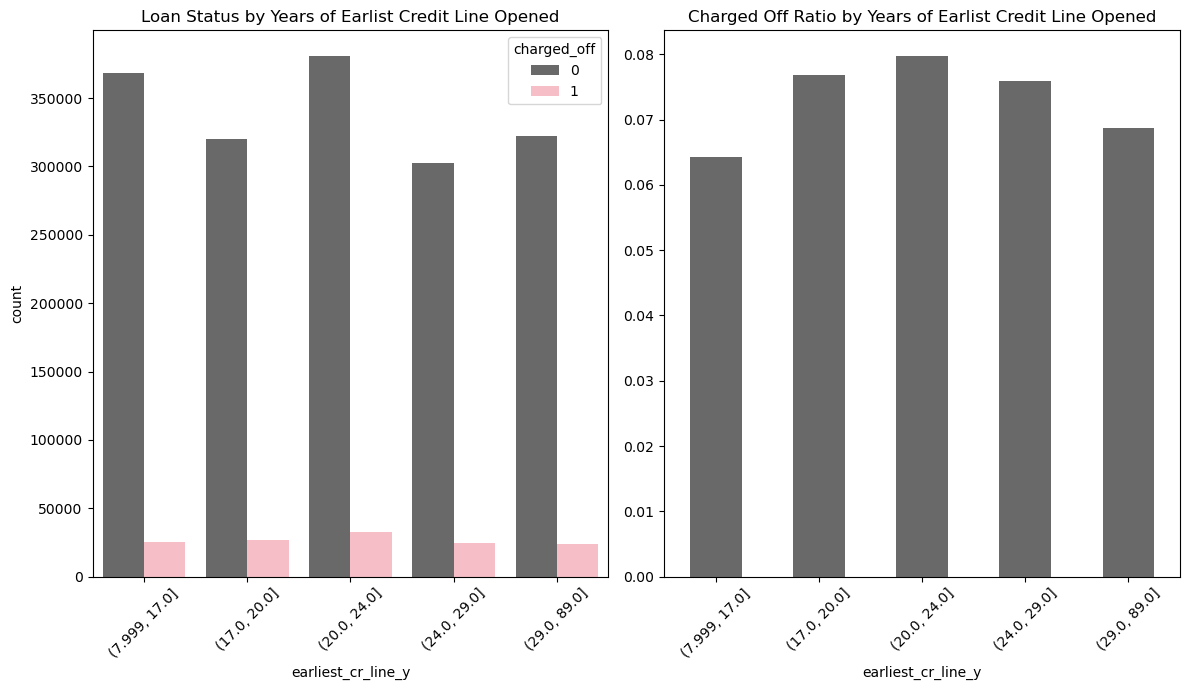

In [205]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(x=group('earliest_cr_line_y',5), data=df, hue='charged_off', palette=gwu)
plt.xticks(rotation=45)  #why we need to use rotation here 
plt.title('Loan Status by Years of Earlist Credit Line Opened')
plt.subplot(1,2,2)
cfratio(df,group('earliest_cr_line_y',5)).plot(kind='bar',color='#696969')
plt.xticks(rotation=45)
plt.title('Charged Off Ratio by Years of Earlist Credit Line Opened')
plt.tight_layout()    #why tight_layout here 

In [219]:
#address, state 
df['addr_state'].unique()

array(['AZ', 'IL', 'VA', 'TX', 'MN', 'NC', 'ME', 'SC', 'MA', 'MI', 'DE',
       'OK', 'CA', 'LA', 'NJ', 'TN', 'MD', 'WA', 'NE', 'UT', 'PA', 'FL',
       'KS', 'IN', 'NY', 'MO', 'GA', 'KY', 'NV', 'ID', 'OH', 'AL', 'MS',
       'CO', 'WY', 'CT', 'WI', 'HI', 'VT', 'DC', 'NM', 'WV', 'OR', 'NH',
       'AR', 'RI', 'MT', 'ND', 'SD', 'AK', 'IA'], dtype=object)

Text(0.5, 1.0, 'top 20 states of loan users')

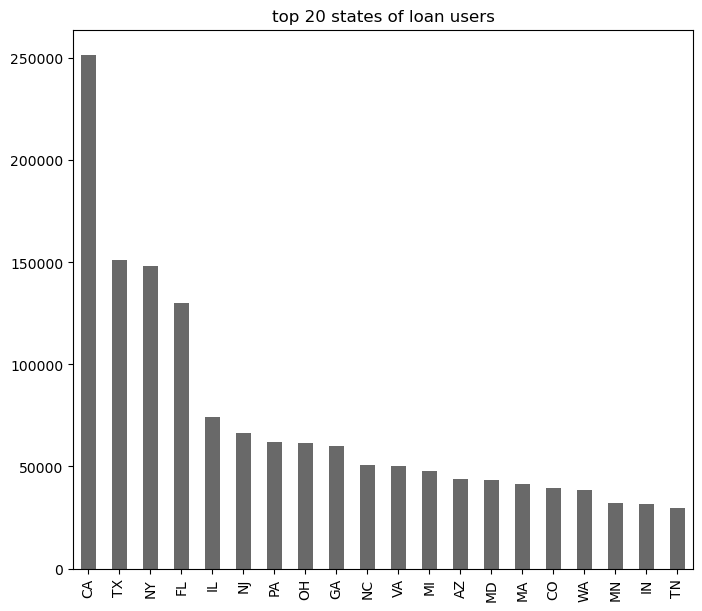

In [226]:
plt.figure(figsize=(8,7))
df['addr_state'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', color='#696969')
plt.title('top 20 states of loan users')

Text(0.5, 1.0, 'Charged Off Ratio by addr_state')

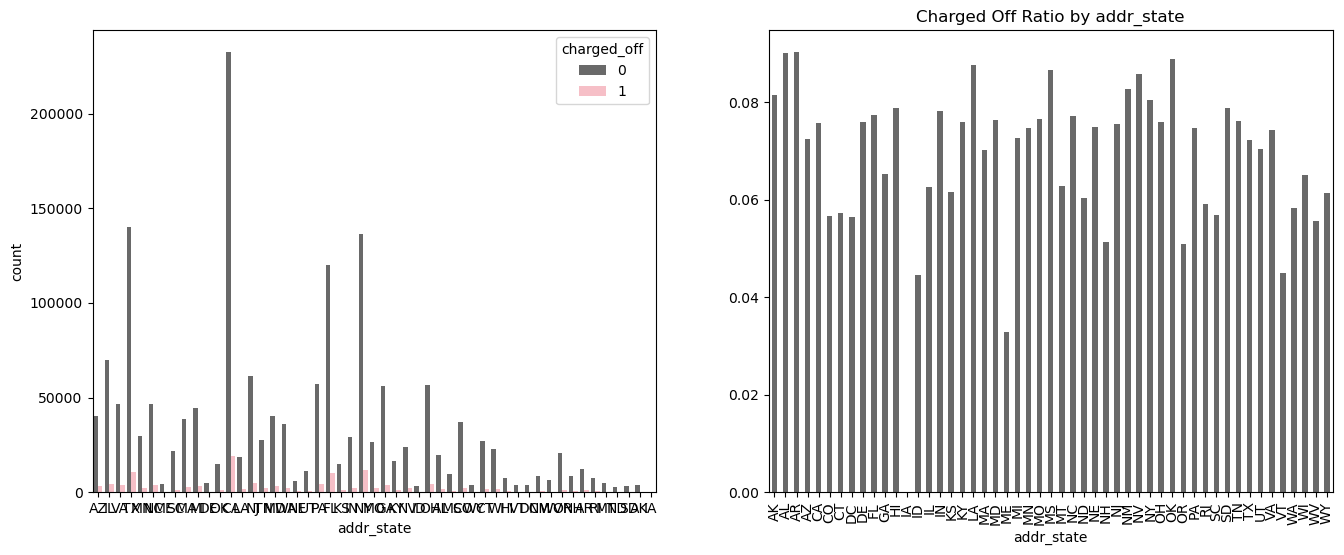

In [233]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='addr_state', hue='charged_off', palette=gwu)
plt.subplot(1,2,2)
cfratio(df,'addr_state').plot(kind='bar', color='#696969')
plt.title('Charged Off Ratio by addr_state')

In [243]:
charge_off_percent = pd.DataFrame(cfratio(df,'addr_state').sort_values(ascending=False))
charge_off_percent = charge_off_percent.reset_index(drop=False)

In [244]:
charge_off_percent

,addr_state,charged_off
0,AR,0.090268
1,AL,0.090140
2,OK,0.088954
3,LA,0.087766
4,MS,0.086645
5,NV,0.085791
6,NM,0.082704
7,AK,0.081522
8,NY,0.080483
9,HI,0.078861


In [1]:
plt.figure(figsize=(16,7))
data = dict(type = 'choropleth',
            locations = charge_off_percent['addr_state'],
            locationmode = 'USA-states',
            z = charge_off_percent['charged_off'],
            marker = dict(line=dict(color='rgb(255,255,255)', width = 2)),
            colorscale = 'Oranges',
            colorbar = {'title':'Charged Off Percentage'},
            )
layout = dict(title = 'Charged Off Percentage of Each State',
              geo = dict(scope='usa')
              )
x = go.Figure(data = [data], layout = layout)
x.update_layout(autosize=False,
                margin = dict(l=0,r=0,b=0,t=50,pad=0,autoexpand=True),
                width=800,
                height=400)
po.iplot(x)

NameError: name 'plt' is not defined

In [ ]:
#we can see lower states have higher charge_off rate

# 3.DATA ENGINEERING
#### 3.1drop all selected features 

In [212]:
df.drop(columns=drop3, inplace=True)

In [217]:
df.drop('issue_y',axis=1, inplace = True)

In [252]:
df.head(2)
print(f'the dataset now has {df.shape}')

the dataset now has (1827125, 18)


#### 3.2dealing with missing data

In [253]:
df.isnull().mean()

term_month             0.000000
int_rate               0.000000
installment            0.000000
sub_grade              0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
addr_state             0.000000
dti                    0.000794
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.000774
initial_list_status    0.000000
application_type       0.000000
mort_acc               0.000000
charged_off            0.000000
earliest_cr_line_y     0.000000
dtype: float64

In [255]:
#missing rate is so low, we can drop it
print(f'the dataset before dropna {df.shape}')
df.dropna(inplace=True)
print(f'the dataset after dropna {df.shape}')


the dataset before dropna (1827125, 18)
the dataset after dropna (1824264, 18)


<Axes: >

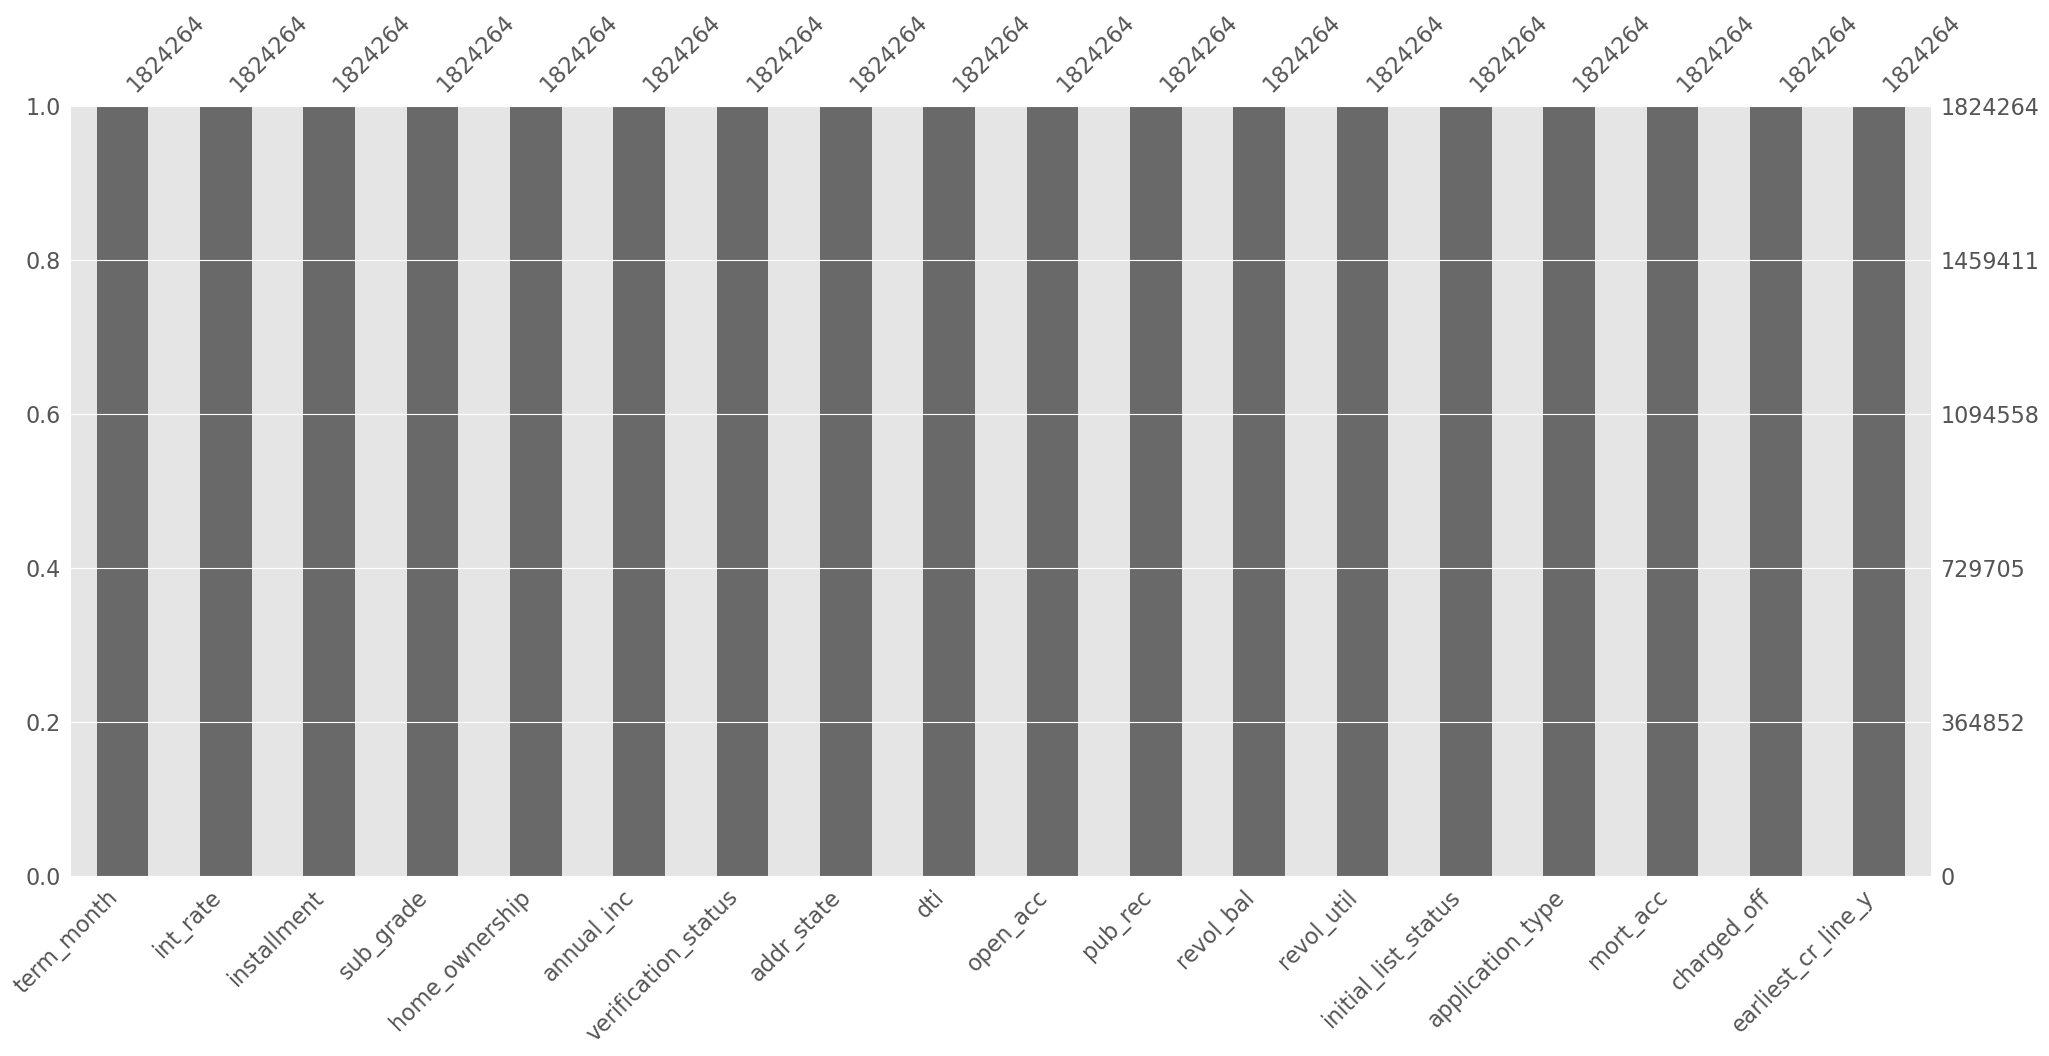

In [257]:
# show the number of data in each column
msno.bar(df)

#### 3.3remove outliers(only remove outliers of continuous features which have large range )

In [258]:
def remove_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    return df[np.abs(df[col]-mean) <= (3*std)]

In [259]:
removel = ['annual_inc','dti','revol_bal','revol_util']

In [264]:
for col in removel:
    df = remove_outlier(df,col)
    print(f'After remove outliers from {col}, we have {df.shape[0]} rows left.')

After remove outliers from annual_inc, we have 1819604 rows left.
After remove outliers from dti, we have 1813216 rows left.
After remove outliers from revol_bal, we have 1788040 rows left.
After remove outliers from revol_util, we have 1787930 rows left.


In [268]:
#3.4create dummy variables
#find all the categorical variables
dummy = [column for column in df.columns if df[column].dtype == object]
dummy

['term_month',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'addr_state',
 'initial_list_status',
 'application_type']

In [273]:
loan_final = pd.get_dummies(df, columns=dummy, drop_first=True)
loan_final.head()

,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,charged_off,earliest_cr_line_y,term_month_60,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,8.81,317.12,56000.0,20.53,7.0,1.0,10494,53.3,3.0,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,27.27,306.97,70000.0,11.37,4.0,0.0,3193,84.0,0.0,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16.91,170.92,111000.0,13.35,12.0,0.0,2809,35.1,0.0,1,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,14.47,1204.23,95000.0,11.61,5.0,0.0,5036,33.8,4.0,1,18,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,10.08,340.59,45000.0,25.52,10.0,0.0,10784,19.5,0.0,1,10,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [274]:
loan_final.shape

(1787930, 104)

In [275]:
#save the file into CSV format
loan_final.to_csv('get_dummied_loan.csv',index=False)

In [276]:
loan= pd.read_csv('/Users/rufen/Documents/ClassIn Files/Files/DS/get_dummied_loan.csv')
loan.head(2)

,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,charged_off,earliest_cr_line_y,term_month_60,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,8.81,317.12,56000.0,20.53,7.0,1.0,10494,53.3,3.0,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,27.27,306.97,70000.0,11.37,4.0,0.0,3193,84.0,0.0,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# column_date=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

# for column in column_date:
#     df[column] = pd.to_datetime(df[column], errors='coerce')

# df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].head(5)

In [45]:
# from pandas_profiling import ProfileReport

In [46]:
# ###profile the dataset first 

# profile = ProfileReport(df, title='project dataset Report',
#                         html={'style':{'full_width':True}})

# # explore report in notebook
# profile.to_widgets()

# # save report
# profile.to_file("DS_inter_project.html")

In [52]:
# ###try to arrange the multiplots  

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a figure and subplots with a 3x3 grid
# fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# # Flatten the axes array to simplify indexing
# axes = axes.flatten()

# # Loop through each feature variable
# for i, feature in enumerate(features):
#     # Loop through each unique value in the targets variable
#     for j, target_value in enumerate(targets):
#         # Select the appropriate subplot
#         ax = axes[i * 3 + j]
        
#         # Create a scatter plot
#         sns.scatterplot(data=df, x=feature, y=targets, ax=ax)
#         ax.set_title(f"Relationship: {feature} vs {targets} ")

# # Remove any unused subplots
# if len(features) < 3 * 3:
#     for k in range(len(features), 3 * 3):
#         fig.delaxes(axes[k])

# # Adjust spacing between subplots
# fig.tight_layout()

# # Show the plot
# plt.show()

In [53]:
# #visualize the relationship 
# fig, axs = plt.subplots(2,2,figsize=(10,10))

# for i, ax in enumerate(axs.flat):
#     try:
#         df_means.loc[:, features].plot(kind='barh', ax=ax)
#         ax.set(xlabel="sub_grade")
#     except:
#         pass
# fig.tight_layout()

In [65]:
# #withdraw fillna(0)
# df = df.replace(0, np.nan)

In [ ]:
# the title of the columns include 'A','B','C','D','E','F','G'
# selected_columns = df.columns[df.columns.str.contains('A|B|C|D|E|F|G')]

# df.drop(columns=selected_columns, axis=1)

In [ ]:
# how to cancel dummies 
# Revert the one-hot encoded columns to the original categorical column
# df['Color'] = df[['Color_Red', 'Color_Blue', 'Color_Green']].idxmax(axis=1).str.split('_').str[1]

# # Remove the one-hot encoded columns
# df = df.drop(['Color_Red', 'Color_Blue', 'Color_Green'], axis=1)

# # Print the DataFrame with the original categorical column
# print(df)